### Imports:

In [1]:
import numpy as np
import random
import data_generation
import high_precision_lr as opt
import low_precision_lr as lp
import precision_util as p_util
import naive_low_precision_lr as naive
import halp_slow as hs

%matplotlib inline
import matplotlib.pyplot as plt

### Generating Data:
* n: number of data points
* d: number of dimensions
* s: scale factor for data (x)
* w: generated true weights (floating points range between -1 and 1)
* x: generated data (x - n by d) (int8 representation with s scale factor)
* y: generated labels for each x data point (floating point) - w*x^T
* xt: ignore this, just extra output from generation
* x_fp: full precision representation of x (floating point)

In [2]:
#n = 100000
n = 10000
d=100
s = 1/128.0
alpha=0.001
w0=np.random.rand(d)
K=20
T=1000
w,x,y,xt = data_generation.generate_data_low_precision_linear_regression(d,n,s)
x_fp = p_util.low_precision_to_float(x,s)

### Running normal SGD

In [4]:
weights_sgd = opt.sgd(w0,alpha, x_fp, y, K*T)
loss_sgd = opt.loss(weights_sgd, x_fp, y)
print("Loss for SGD: " + str(loss_sgd))

Loss for SGD: 0.0194506816874


### Running normal SVRG

In [3]:
weights_svrg, time_array_normal_SVRG, loss_array_normal_SVRG = opt.svrg(w0,alpha, x_fp, y, K, T, calc_loss=True)
loss_svrg= opt.loss(weights_svrg, x_fp, y)
print("Loss for Full Precision SVRG: " + str(loss_svrg))

Loss for Full Precision SVRG: 0.018570182072


#### Plotting Time

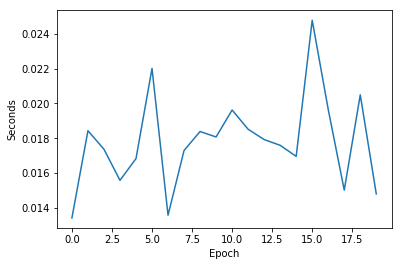

In [8]:
plt.plot(time_array_normal_SVRG)
plt.ylabel('Seconds')
plt.xlabel('Epoch')
plt.show()

#### Plotting Training Loss

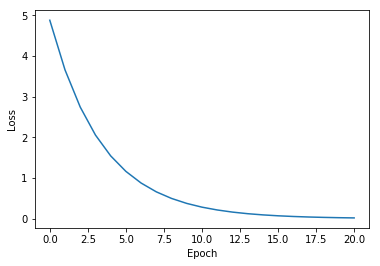

In [9]:
plt.plot(loss_array_normal_SVRG)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Running Naive LP SVRG  (sigma=1 b=16) = int16

In [4]:
weights_slow_lp_svrg, time_array_naive_LPSVRG, loss_array_naive_LPSVRG = naive.lp_svrg_lr(w0,alpha, x_fp, y, K, T)
loss_naive_LPSVRG= opt.loss(weights_slow_lp_svrg, x_fp, y)
print(loss_naive_LPSVRG)

1.31479015796


#### Plotting Time comparing with nornal SVRG

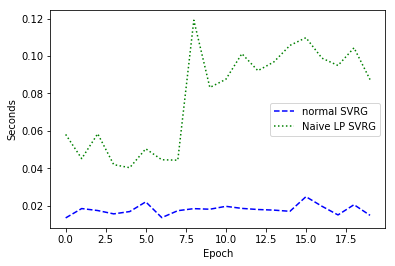

In [11]:
fig, ax = plt.subplots()
ax.plot(time_array_normal_SVRG, 'k--', color='b', label='normal SVRG')
ax.plot(time_array_naive_LPSVRG, 'k:',color='g', label='Naive LP SVRG')

plt.ylabel('Seconds')
plt.xlabel('Epoch')

legend = ax.legend(loc='right')
legend.get_frame()

plt.show()

#### Plotting Error comparing with nornal SVRG

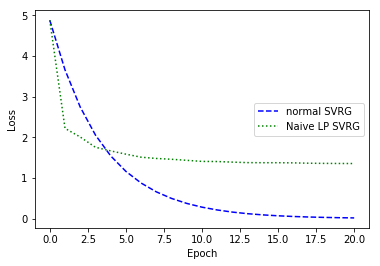

In [12]:
fig, ax = plt.subplots()
ax.plot(loss_array_normal_SVRG, 'k--', color='b', label='normal SVRG')
ax.plot(loss_array_naive_LPSVRG, 'k:',color='g', label='Naive LP SVRG')

plt.xlabel('Epoch')
plt.ylabel('Loss')

legend = ax.legend(loc='right')
legend.get_frame()

plt.show()

### LP-SVRG - Algorithm 3

In [5]:
weights_svrg_lp, time_array_LP_SVRG, loss_array_LP_SVRG = lp.svrg(w0,alpha, x, y, K, T, calc_loss=True)
loss_svrg_lp = opt.loss(weights_svrg_lp, x_fp, y)
print(loss_svrg_lp)

== > start epoch 1
Compute gradient -- Time cost:  0.2143864631652832
Begin quantize to green
Finished quantize to green, Time cost 0.00028896331787109375
Start epoch  0  inner iter
Finished epoch  1  inner iter, Total time cost  0.1800675392150879
     Time cost for gradident:  0.023386716842651367
     Time cost for quantization:  0.08655166625976562
     Time cost for dot product:  0.023018598556518555
     Time cost for summing:  0.019773006439208984
-----------------------------------------------
== > start epoch 2
Compute gradient -- Time cost:  0.18538904190063477
Begin quantize to green
Finished quantize to green, Time cost 0.00019359588623046875
Start epoch  1  inner iter
Finished epoch  2  inner iter, Total time cost  0.13080382347106934
     Time cost for gradident:  0.021399497985839844
     Time cost for quantization:  0.0643317699432373
     Time cost for dot product:  0.007819652557373047
     Time cost for summing:  0.01694202423095703
----------------------------------

Compute gradient -- Time cost:  0.18493938446044922
Begin quantize to green
Finished quantize to green, Time cost 0.0001747608184814453
Start epoch  17  inner iter
Finished epoch  18  inner iter, Total time cost  0.13924169540405273
     Time cost for gradident:  0.023031949996948242
     Time cost for quantization:  0.07160758972167969
     Time cost for dot product:  0.006742715835571289
     Time cost for summing:  0.017872333526611328
-----------------------------------------------
== > start epoch 19
Compute gradient -- Time cost:  0.2001209259033203
Begin quantize to green
Finished quantize to green, Time cost 0.0001735687255859375
Start epoch  18  inner iter
Finished epoch  19  inner iter, Total time cost  0.12115716934204102
     Time cost for gradident:  0.020644187927246094
     Time cost for quantization:  0.06402897834777832
     Time cost for dot product:  0.006476163864135742
     Time cost for summing:  0.014679908752441406
-----------------------------------------------

In [14]:
weights_svrg_lp

array([ 0.01858521,  0.03503418,  0.050354  , -0.00924683,  0.02929688,
        0.02319336,  0.02737427,  0.01486206,  0.00366211,  0.0296936 ,
        0.01818848,  0.02502441,  0.02633667,  0.00097656,  0.01147461,
       -0.0005188 ,  0.00204468, -0.00848389,  0.01312256,  0.01025391])

In [15]:
loss_array_LP_SVRG

[0.34519367196477063,
 0.34490353721118161,
 0.34288427388358117,
 0.34296014020768489,
 0.34304606761857998,
 0.3418657362601869,
 0.34137706684825142,
 0.34116958668551955,
 0.34116545693376926,
 0.34126206157795336]

#### Plotting Time

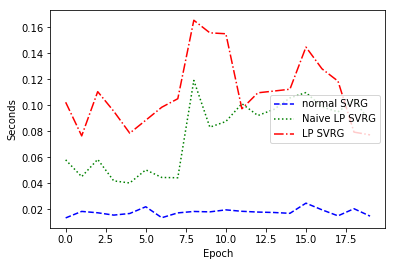

In [17]:
fig, ax = plt.subplots()
ax.plot(time_array_normal_SVRG, 'k--', color='b', label='normal SVRG')
ax.plot(time_array_naive_LPSVRG, 'k:',color='g', label='Naive LP SVRG')
ax.plot(time_array_LP_SVRG, 'k-.',color='r', label='LP SVRG')

plt.ylabel('Seconds')
plt.xlabel('Epoch')

legend = ax.legend(loc='right')
legend.get_frame()

plt.show()



#### Plotting Error

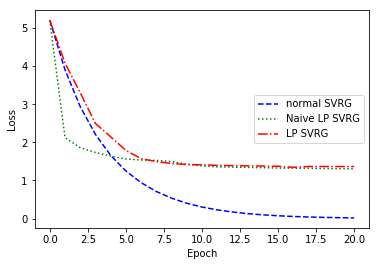

In [6]:
fig, ax = plt.subplots()
ax.plot(loss_array_normal_SVRG, 'k--', color='b', label='normal SVRG')
ax.plot(loss_array_naive_LPSVRG, 'k:',color='g', label='Naive LP SVRG')
ax.plot(loss_array_LP_SVRG, 'k-.',color='r', label='LP SVRG')


plt.xlabel('Epoch')
plt.ylabel('Loss')

legend = ax.legend(loc='right')
legend.get_frame()

plt.show()

## HALP (Slow)

In [35]:
mu=[0.5,1,3,5,10,15,20]
loss_halp_slow=[0.5,1,2,3,4,5,10]
loss_halp_slow_array=np.zeros((len(mu),K))
for i in range(len(mu)):
    weights_halp_slow, time_halp_slow_array, loss_halp_slow_array[i,:] = hs.halp(w0,alpha, x_fp, y, K,T,mu[i],16,np.int16)
    loss_halp_slow[i] = opt.loss(weights_halp_slow, x_fp, y)

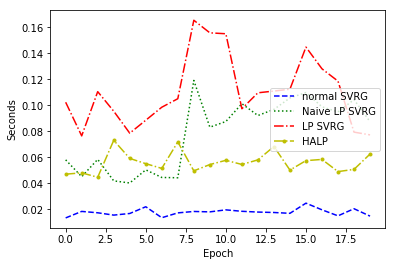

In [18]:
fig, ax = plt.subplots()
ax.plot(time_array_normal_SVRG, 'k--', color='b', label='normal SVRG')
ax.plot(time_array_naive_LPSVRG, 'k:',color='g', label='Naive LP SVRG')
ax.plot(time_array_LP_SVRG, 'k-.',color='r', label='LP SVRG')
ax.plot(time_halp_slow_array, 'k-..',color='y', label='HALP')


plt.ylabel('Seconds')
plt.xlabel('Epoch')

legend = ax.legend(loc='right')
legend.get_frame()

plt.show()


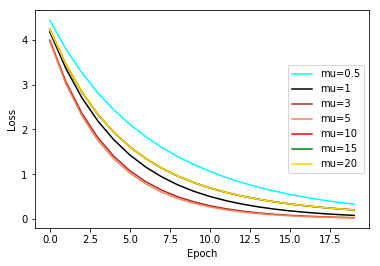

In [36]:
fig, ax = plt.subplots()
ax.plot(loss_halp_slow_array[0,:], color='aqua', label='mu=0.5')
ax.plot(loss_halp_slow_array[1,:], color='black', label='mu=1')
ax.plot(loss_halp_slow_array[2,:], color='brown', label='mu=3')
ax.plot(loss_halp_slow_array[3,:], color='coral', label='mu=5')
ax.plot(loss_halp_slow_array[4,:], color='r', label='mu=10')
ax.plot(loss_halp_slow_array[4,:], color='g', label='mu=15')
ax.plot(loss_halp_slow_array[4,:], color='gold', label='mu=20')

plt.xlabel('Epoch')
plt.ylabel('Loss')

legend = ax.legend(loc='right')
legend.get_frame()

plt.show()


In [12]:
weights_halp_slow, time_halp_slow_array, loss_halp_slow_array= hs.halp(w0,alpha, x_fp, y, K,T,3,16,np.int16)
loss_halp_slow = opt.loss(weights_halp_slow, x_fp, y)

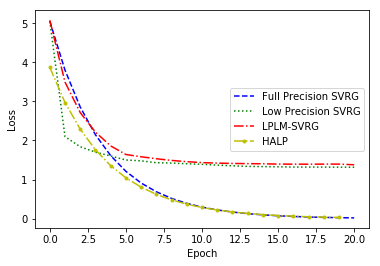

In [13]:
fig, ax = plt.subplots()
ax.plot(loss_array_normal_SVRG, 'k--', color='b', label='Full Precision SVRG')
ax.plot(loss_array_naive_LPSVRG, 'k:',color='g', label='Low Precision SVRG')
ax.plot(loss_array_LP_SVRG, 'k-.',color='r', label='LPLM-SVRG')
ax.plot(loss_halp_slow_array, 'k-..',color='y', label='HALP')


plt.xlabel('Epoch')
plt.ylabel('Loss')

legend = ax.legend(loc='right')
legend.get_frame()

plt.show()